# Coupled Model

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
# set up plotting settings for dark mode.
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_utils import ps_defaults
ps_defaults(use_tex=False, dpi=150)
from IPython.display import Latex

In [3]:
import os
import matplotlib.pyplot as plt
import xarray as xr

In [4]:
from src.configs.load_config import load_config
from src.xr_utils import can_coords

In [5]:
from src.models.model_setup import ModelSetup
from src.constants import TEST_DIREC

In [6]:
cfg = load_config(test=False)
setup = ModelSetup(str(TEST_DIREC), cfg)

In [7]:
from src.models.ocean import Ocean
from src.models.atmos import Atmos
from src.models.coupling import Coupling

In [8]:
os.listdir(setup.atmos_data_path)

['clt-ECMWF-clim60.nc',
 'mask-360x180.nc',
 'mask-360x181.nc',
 'pr-ECMWF-clim.nc',
 'pr-ECMWF-trend.nc',
 'ps-ECMWF-clim.nc',
 'rh-ECMWF-clim60.nc',
 'rh-fixed-clim60.nc',
 'sfcWind-ECMWF-clim60.nc',
 'sfcWind-ECMWF-clim.nc',
 'sst-ECMWF-clim.nc',
 'sst-ECMWF-trend.nc',
 'ts-ECMWF-clim60.nc',
 'ts-ECMWF-clim.nc',
 'ts-ECMWF-trend.nc',
 'ts-1-trend.nc',
 'ts-1-clim60.nc',
 'ts-1-clim.nc']

In [9]:
xr.open_dataset(os.path.join(setup.atmos_data_path, "sfcWind-ECMWF-clim60.nc"))

<xarray.Dataset>
Dimensions:  (lat: 121, lon: 360)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -60.0 -59.0 -58.0 -57.0 -56.0 ... 57.0 58.0 59.0 60.0
Data variables:
    sfcWind  (lat, lon) float32 ...

In [10]:
sfcwind = xr.open_dataset(os.path.join(setup.atmos_data_path, "sfcWind-ECMWF-clim.nc")).sfcWind #.plot()
print(sfcwind)

<xarray.DataArray 'sfcWind' (Y: 181, X: 360)>
array([[5.70018 , 5.692569, 5.684958, ..., 5.685765, 5.689994, 5.695087],
       [6.067078, 6.05497 , 6.042863, ..., 6.071806, 6.06957 , 6.068324],
       [6.433976, 6.417371, 6.400766, ..., 6.457846, 6.449146, 6.441561],
       ...,
       [5.673502, 5.673409, 5.673316, ..., 5.649358, 5.656786, 5.665144],
       [5.66669 , 5.664417, 5.662143, ..., 5.646687, 5.652813, 5.659751],
       [5.659877, 5.655424, 5.65097 , ..., 5.644016, 5.64884 , 5.654359]])
Coordinates:
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Attributes:
    units:      m s**-1
    long_name:  sfcWind
    longname:   sfcWind


In [11]:
print(xr.open_dataset(setup.tau_x(0), decode_times=False).taux)

<xarray.DataArray 'taux' (T: 720, Z: 1, Y: 181, X: 360)>
[46915200 values with dtype=float32]
Coordinates:
  * Z        (Z) float32 0.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * T        (T) float32 -23.5 -22.5 -21.5 -20.5 ... 692.5 693.5 694.5 695.5
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Attributes:
    units:          N/m2
    dodsname:       taux
    standard_name:  surface_downward_eastward_stress
    longname:       taux
    long_name:      taux


In [12]:
print(xr.open_dataset(setup.tau_y(0), decode_times=False).tauy)

<xarray.DataArray 'tauy' (T: 720, Z: 1, Y: 181, X: 360)>
[46915200 values with dtype=float32]
Coordinates:
  * Z        (Z) float32 0.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * T        (T) float32 -23.5 -22.5 -21.5 -20.5 ... 692.5 693.5 694.5 695.5
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Attributes:
    units:          N/m2
    dodsname:       tauy
    standard_name:  surface_downward_northward_stress
    longname:       tauy
    long_name:      tauy


run 1863648000000000000 slope <xarray.DataArray 'polyfit_coefficients' (Z: 1, Y: 181, X: 360)>
array([[[-3.93653326e-21, -3.93631823e-21, -3.93594275e-21, ...,
         -3.96822641e-21, -3.95740218e-21, -3.95027875e-21],
        [-1.03532934e-20, -1.04320919e-20, -1.04973676e-20, ...,
         -9.98615135e-21, -1.01128398e-20, -1.02495008e-20],
        [-1.09852435e-20, -1.10228876e-20, -1.10354427e-20, ...,
         -1.04944013e-20, -1.06656014e-20, -1.08525049e-20],
        ...,
        [-4.51610466e-22, -4.46769239e-22, -4.47819525e-22, ...,
         -3.33520215e-22, -3.70637054e-22, -3.93491717e-22],
        [-5.04710267e-22, -4.92934687e-22, -4.89063495e-22, ...,
         -5.47922590e-22, -5.31494374e-22, -5.12526977e-22],
        [ 4.21404734e-22,  4.15297780e-22,  4.06514094e-22, ...,
          4.15099372e-22,  4.18108063e-22,  4.20434559e-22]]])
Coordinates:
  * Z        (Z) float64 0.0
  * Y        (Y) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * X        

Text(0.5, 1.0, '')

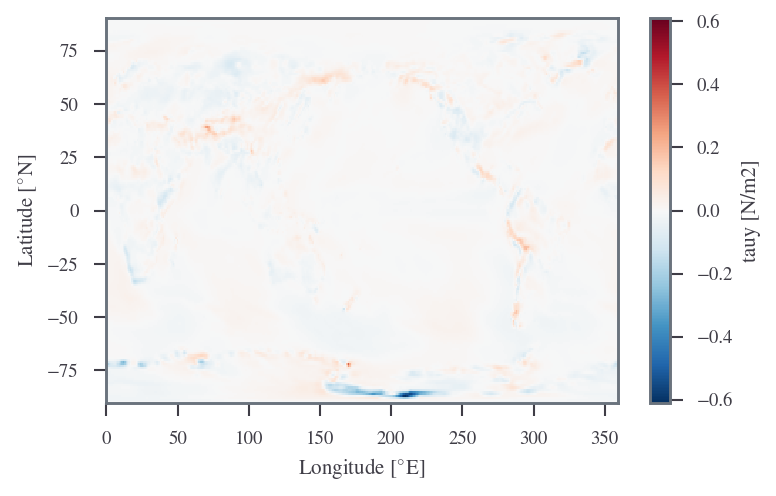

In [13]:
from src.xr_utils import open_dataset, get_trend

get_trend(open_dataset(setup.tau_y(0)).tauy).plot()
plt.title("")

run 1863648000000000000 slope <xarray.DataArray 'polyfit_coefficients' (Z: 1, Y: 181, X: 360)>
array([[[ 3.83526157e-21,  3.82343982e-21,  3.80501522e-21, ...,
          3.89084012e-21,  3.87526086e-21,  3.86479766e-21],
        [-3.00631175e-21, -2.85193627e-21, -2.69499337e-21, ...,
         -3.24663280e-21, -3.16766869e-21, -3.08200266e-21],
        [-5.50866015e-21, -5.18776751e-21, -4.83243808e-21, ...,
         -6.18571755e-21, -5.97131383e-21, -5.75597719e-21],
        ...,
        [-1.10492399e-21, -1.17578443e-21, -1.26026478e-21, ...,
         -1.08893002e-21, -1.08920419e-21, -1.10479665e-21],
        [-1.50529564e-21, -1.50631329e-21, -1.50007508e-21, ...,
         -1.49240443e-21, -1.49916492e-21, -1.51239656e-21],
        [-1.68981009e-22, -1.57186548e-22, -1.39610417e-22, ...,
         -2.06734722e-22, -1.96103953e-22, -1.88860959e-22]]])
Coordinates:
  * Z        (Z) float64 0.0
  * Y        (Y) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * X        

Text(0.5, 1.0, '')

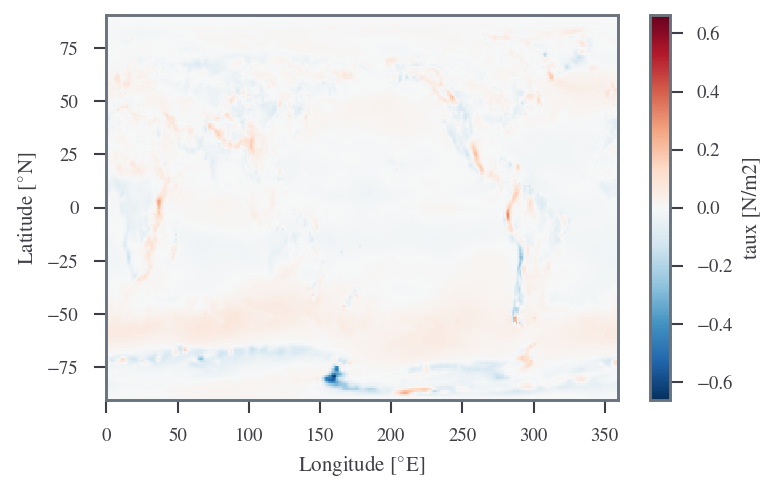

In [14]:
get_trend(open_dataset(setup.tau_x(0)).taux).plot()
plt.title("")

In [15]:
vend = xr.open_dataset(setup.tcam_output()).vend
print(vend)

<xarray.DataArray 'vend' (Yv: 60, X: 180)>
array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       [ 0.196006,  0.197174,  0.198974, ...,  0.183193,  0.189842,  0.193649],
       [ 0.391522,  0.393037,  0.39803 , ...,  0.376646,  0.386403,  0.390628],
       ...,
       [-0.222567, -0.213813, -0.147471, ...,  0.086837,  0.004823, -0.139208],
       [-0.125407, -0.104303, -0.061559, ...,  0.103799,  0.011927, -0.094893],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yv       (Yv) float64 -59.0 -57.0 -55.0 -53.0 -51.0 ... 53.0 55.0 57.0 59.0


In [16]:
uend = xr.open_dataset(setup.tcam_output()).uend
print(uend)

<xarray.DataArray 'uend' (Yu: 59, X: 180)>
array([[ 0.844091,  0.823374,  0.800338, ...,  0.895247,  0.88165 ,  0.86479 ],
       [-0.707088, -0.731001, -0.758755, ..., -0.624037, -0.652707, -0.679486],
       [-2.100432, -2.128271, -2.162496, ..., -1.968396, -2.017987, -2.061607],
       ...,
       [-2.924857, -2.92998 , -2.945741, ..., -3.206987, -3.125429, -3.018339],
       [-2.103311, -2.129041, -2.140072, ..., -2.356401, -2.248095, -2.145802],
       [-1.277602, -1.311063, -1.309553, ..., -1.498653, -1.325758, -1.25641 ]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


In [46]:
from scipy.interpolate import interp2d

In [49]:
fuend = interp2d(uend.X, uend.Yu, uend, kind="linear")
fuend(sfw50, )

In [54]:
sfcw50 = sfcwind.sel(Y=slice(-50, 50))

In [55]:
sfcw50.X

<xarray.DataArray 'X' (X: 360)>
array([  0.,   1.,   2., ..., 357., 358., 359.], dtype=float32)
Coordinates:
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes:
    long_name:   longitude
    period:      360.0
    pointwidth:  1.0
    modulus:     360.0
    gridtype:    1
    units:       degree_east

In [94]:
def get_tau_anom(wind, u_vel, v_vel):
    sfcw50 = wind.sel(Y=slice(-50, 50))
    ds = xr.Dataset(
        {
            "X": ("X", sfcw50.X.values),
            "Y": ("Y", sfcw50.Y.values),
        }
    )
    fuend = interp2d(u_vel.X, u_vel.Yu, u_vel, kind="linear")
    ds["u_vel"] =  (["Y", "X"], fuend(sfcw50.X.values, sfcw50.Y.values))
    fuend = interp2d(v_vel.X, v_vel.Yv, v_vel, kind="linear")
    ds["v_vel"] =  (["Y", "X"], fuend(sfcw50.X.values, sfcw50.Y.values))
    t_u, t_v = coup.f_stress(
        sfcw50,
        ds.u_vel,
        ds.v_vel,
    )
    return cut_and_taper(t_u).rename("tau_u"), cut_and_taper(t_v).rename("tau_v")

In [109]:
def tau_anom_ds():
    sfcwind = xr.open_dataset(
        os.path.join(setup.atmos_data_path, "sfcWind-ECMWF-clim.nc")
    ).sfcWind
    ubeg = xr.open_dataset(setup.tcam_output()).ubeg
    vbeg = xr.open_dataset(setup.tcam_output()).vbeg
    utrend = xr.open_dataset(setup.tcam_output()).utrend
    vtrend = xr.open_dataset(setup.tcam_output()).vtrend
    uend = xr.open_dataset(setup.tcam_output()).uend
    vend = xr.open_dataset(setup.tcam_output()).vend
    t_beg_u, t_beg_v = get_tau_anom(sfcwind, ubeg, vbeg)
    t_end_u, t_end_v = get_tau_anom(sfcwind, uend, vend)
    t_trend_u, t_trend_v = get_tau_anom(sfcwind, utrend, vtrend)
    t_beg_u = t_beg_u.rename("t_beg_u")
    t_beg_v = t_beg_v.rename("t_beg_v")
    t_end_u = t_end_u.rename("t_end_u")
    t_end_v = t_end_u.rename("t_end_v")
    t_trend_u = t_trend_u.rename("t_trend_u")
    t_trend_v = t_trend_v.rename("t_trend_v")
    return xr.merge([t_beg_u, t_beg_v, t_end_u, t_end_v, t_trend_u, t_trend_v])


In [110]:
ds = tau_anom_ds()

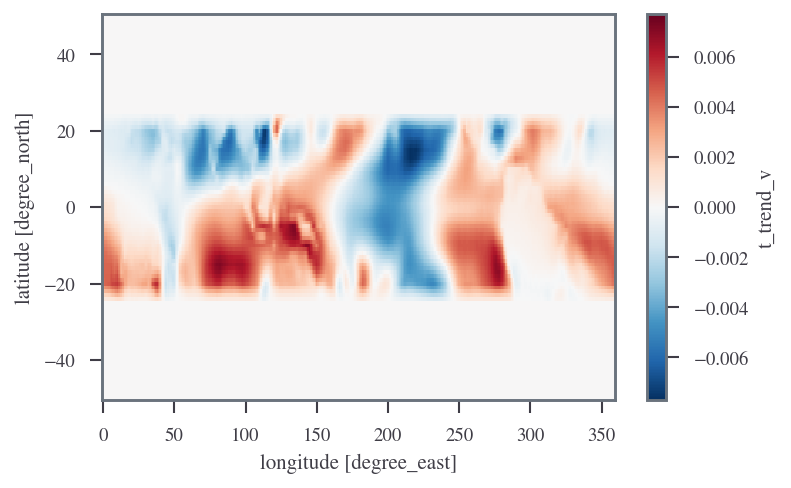

In [112]:
ds.t_trend_v.plot()

In [111]:
ds.to_netcdf("tau-anomalies.nc")

In [84]:
t_end_u, t_end_v = get_tau_anom(sfcwind, uend, vend)

In [85]:
ubeg = xr.open_dataset(setup.tcam_output()).ubeg
vbeg = xr.open_dataset(setup.tcam_output()).vbeg

In [101]:
utrend = xr.open_dataset(setup.tcam_output()).utrend
vtrend = xr.open_dataset(setup.tcam_output()).vtrend

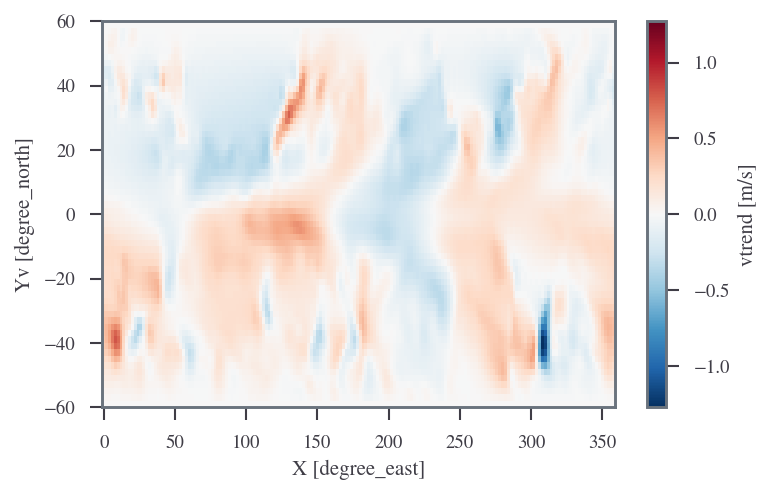

In [102]:
vtrend.plot()

In [95]:
t_beg_u, t_beg_v = get_tau_anom(sfcwind, ubeg, vbeg)

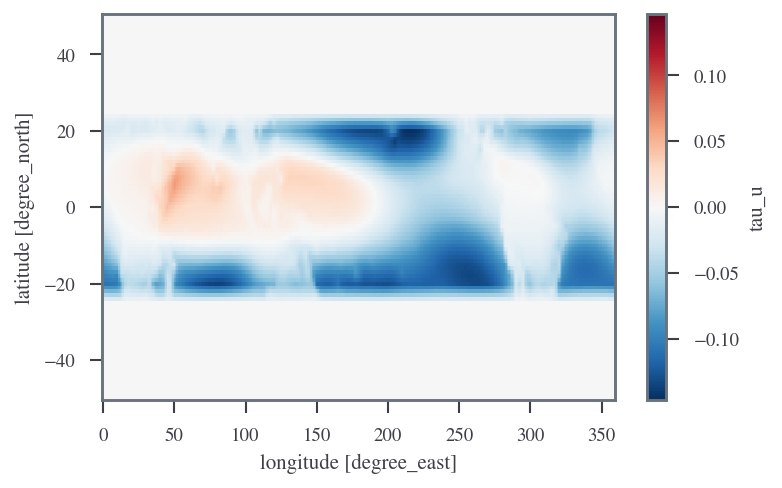

In [96]:
t_beg_u.plot()

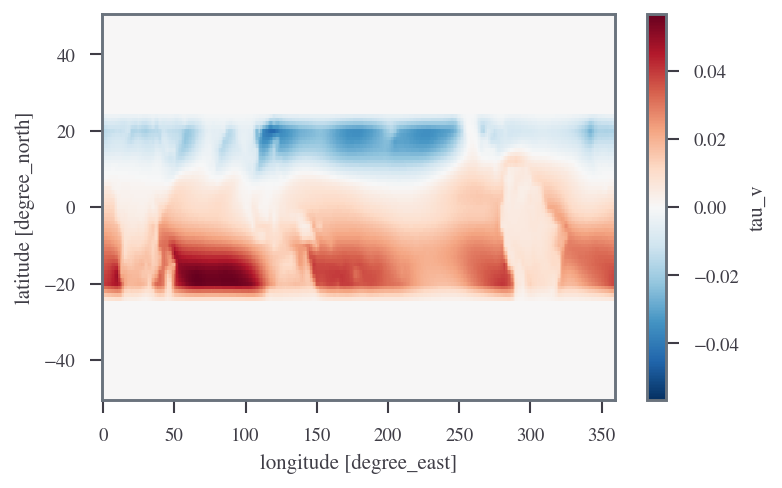

In [97]:
t_beg_v.plot()

In [ ]:
t_beg_u.

In [66]:
sfcw50 = sfcwind.sel(Y=slice(-50, 50))
ds = xr.Dataset(
    {
        "X": ("X", sfcw50.X.values),
        "Y": ("Y", sfcw50.Y.values),
    }
)
fuend = interp2d(uend.X, uend.Yu, uend, kind="linear")
ds["uend"] =  (["Y", "X"], fuend(sfcw50.X.values, sfcw50.Y.values))
fuend = interp2d(vend.X, vend.Yv, vend, kind="linear")
ds["vend"] =  (["Y", "X"], fuend(sfcw50.X.values, sfcw50.Y.values))

In [69]:
t_u, t_v = coup.f_stress(
    sfcw50,
    ds.uend,
    ds.vend,
)

In [73]:
from src.xr_utils import cut_and_taper

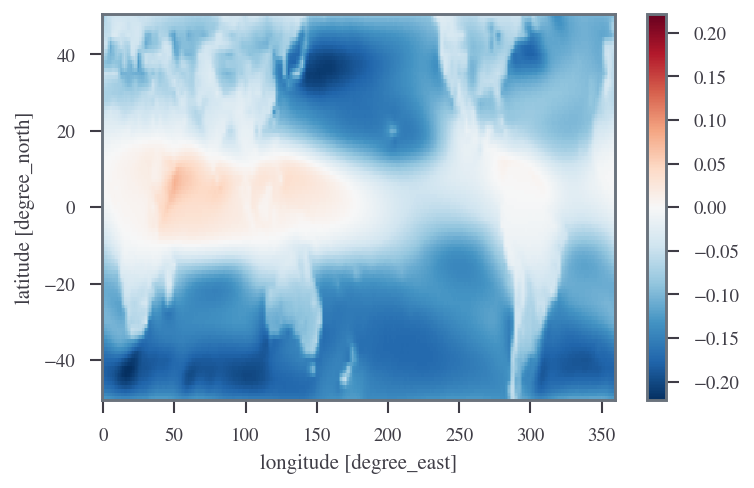

In [70]:
t_u.plot()

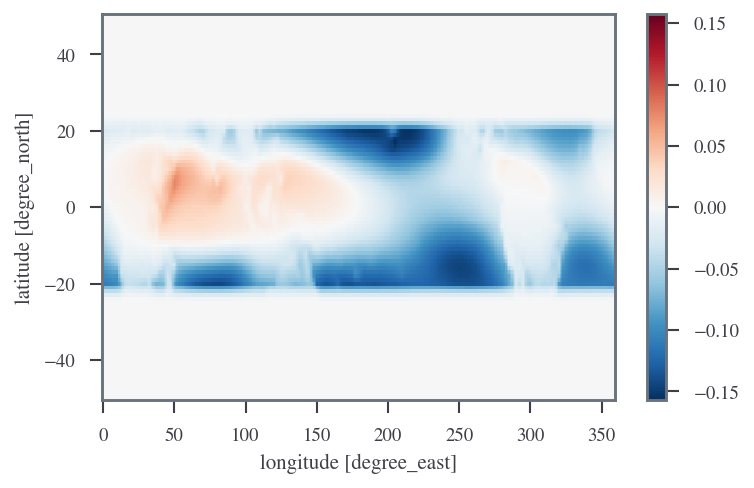

In [75]:
cut_and_taper(t_u).plot()

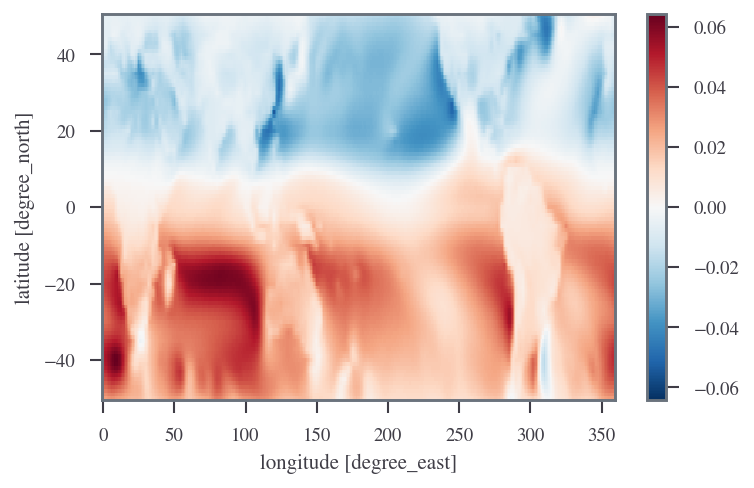

In [71]:
t_v.plot()

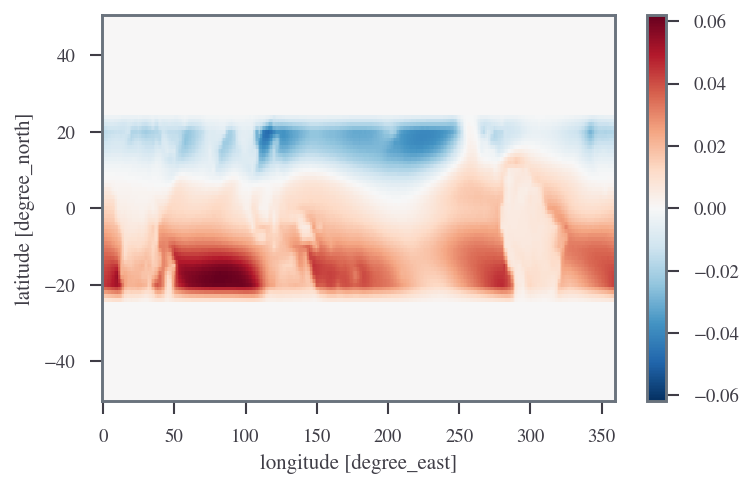

In [76]:
cut_and_taper(t_v).plot()

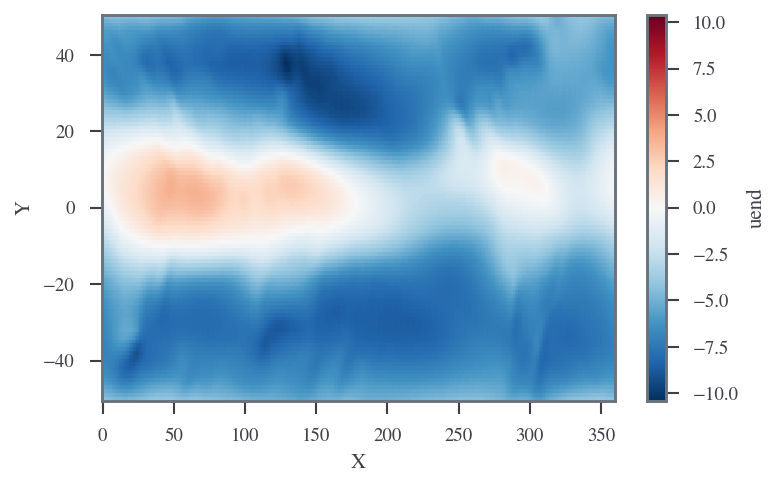

In [67]:
ds.uend.plot()

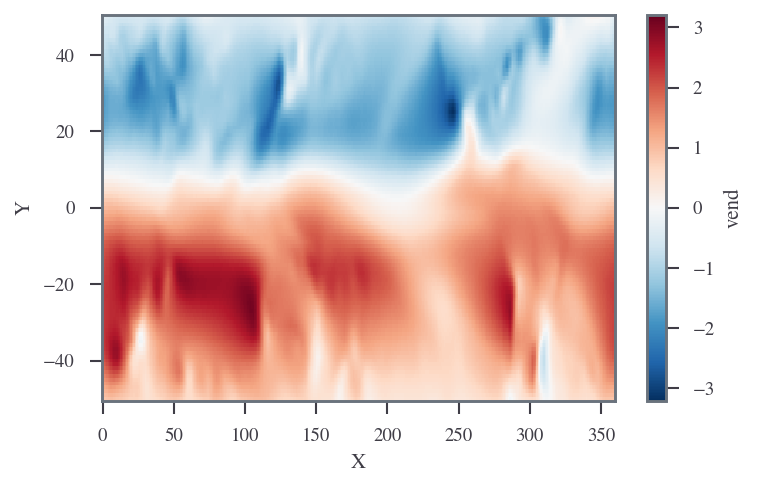

In [68]:
ds.vend.plot()

In [59]:
sfcw50.Y.values
sfcw50.X.values

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [56]:
uend

<xarray.DataArray 'uend' (Yu: 59, X: 180)>
array([[ 0.844091,  0.823374,  0.800338, ...,  0.895247,  0.88165 ,  0.86479 ],
       [-0.707088, -0.731001, -0.758755, ..., -0.624037, -0.652707, -0.679486],
       [-2.100432, -2.128271, -2.162496, ..., -1.968396, -2.017987, -2.061607],
       ...,
       [-2.924857, -2.92998 , -2.945741, ..., -3.206987, -3.125429, -3.018339],
       [-2.103311, -2.129041, -2.140072, ..., -2.356401, -2.248095, -2.145802],
       [-1.277602, -1.311063, -1.309553, ..., -1.498653, -1.325758, -1.25641 ]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0

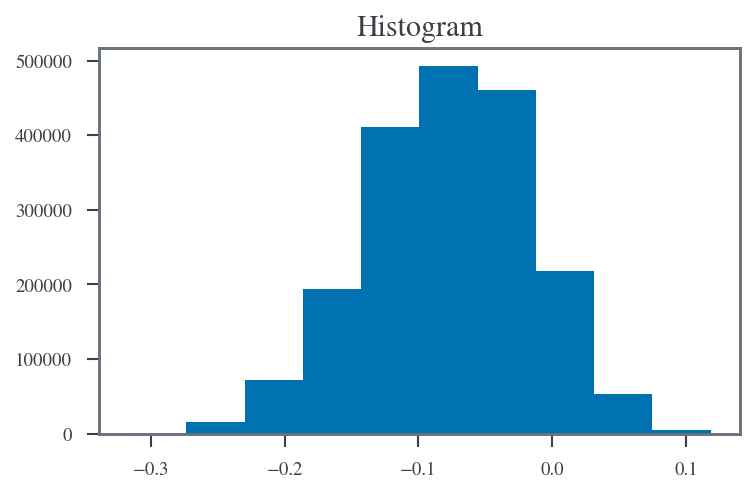

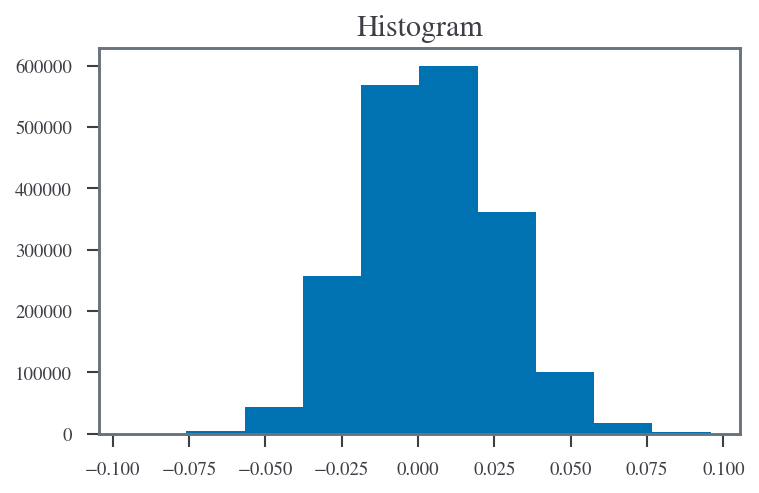

In [18]:
coup = Coupling(cfg, setup)
t_u, t_v = coup.f_stress(
    sfcwind,
    uend,
    vend,
)

t_u.plot()
plt.show()

t_v.plot()
plt.show()

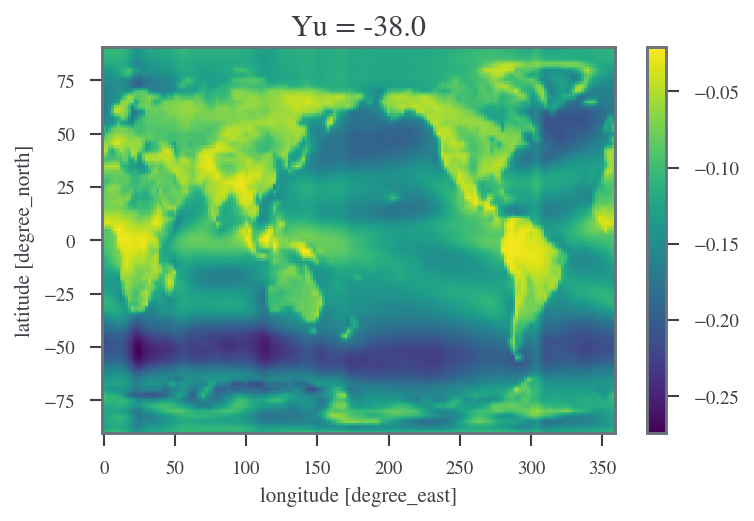

In [26]:
t_u.isel(Yu=10).plot()

In [27]:
os.listdir(setup.ocean_data_path)

['dQdf-sample.nc',
 'dQdT-sample.nc',
 'om_mask.nc',
 'qflx-0.nc',
 'qflx.nc',
 'qflx-test.nc',
 'rzk.pro',
 'spline_ECMWF.txt',
 'sst-ECMWF-clim.nc',
 'tau-ECMWF-clim.x',
 'tau-ECMWF-clim.y',
 'tau-ECMWF.x',
 'tau-ECMWF.y',
 'it0dq_df.nc',
 'it0_dq_dt.nc',
 'it1dq_df.nc',
 'it1_dq_dt.nc',
 'it2dq_df.nc',
 'it2_dq_dt.nc',
 'it3dq_df.nc',
 'it3_dq_dt.nc',
 'it4dq_df.nc',
 'it4_dq_dt.nc',
 'it1.x',
 'it1_dq_df.nc',
 'it1-tau.x',
 'it1-tau.y',
 'it_1_tau.x',
 'it_1_tau.y',
 'it_1_dq_df.nc',
 'it_1_dq_dt.nc',
 'it_2_dq_df.nc',
 'it_2_dq_dt.nc',
 'it_2_tau.x',
 'it_2_tau.y',
 'it_3_dq_df.nc',
 'it_3_dq_dt.nc',
 'it_3_tau.x',
 'it_3_tau.y',
 'it_4_dq_df.nc',
 'it_4_dq_dt.nc',
 'it_4_tau.x',
 'it_4_tau.y',
 'it_1_clim_tau.x',
 'it_1_clim_tau.y',
 'it_2_clim_tau.x',
 'it_2_clim_tau.y',
 'it_3_clim_tau.x',
 'it_3_clim_tau.y',
 'it_4_clim_tau.x',
 'it_4_clim_tau.y']

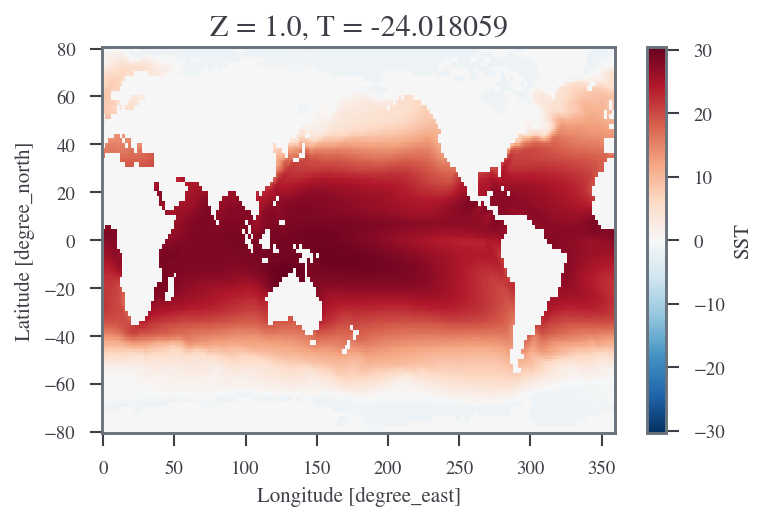

In [28]:
can_coords(xr.open_dataset(setup.om_run2f_nc(), decode_times=False).SST_SST).isel(T=0, Z=0).plot()

In [37]:
uend.Yu

<xarray.DataArray 'Yu' (Yu: 59)>
array([-58., -56., -54., -52., -50., -48., -46., -44., -42., -40., -38., -36.,
       -34., -32., -30., -28., -26., -24., -22., -20., -18., -16., -14., -12.,
       -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.,  12.,
        14.,  16.,  18.,  20.,  22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,
        38.,  40.,  42.,  44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.])
Coordinates:
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0
Attributes:
    units:    degree_north

In [41]:
vend.sel(Yv=slice(-40, 40))

<xarray.DataArray 'vend' (Yv: 40, X: 180)>
array([[ 2.074058,  2.219433,  2.382119, ...,  1.720285,  1.848086,  1.95616 ],
       [ 2.192008,  2.329389,  2.478274, ...,  1.815426,  1.945917,  2.067084],
       [ 2.244158,  2.362707,  2.482151, ...,  1.887766,  2.010991,  2.129108],
       ...,
       [-1.366784, -1.252061, -1.221425, ..., -1.380387, -1.478064, -1.503893],
       [-1.191506, -1.033232, -1.014608, ..., -1.258682, -1.309641, -1.326244],
       [-1.023715, -0.908095, -0.932394, ..., -1.126122, -1.114596, -1.11378 ]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yv       (Yv) float64 -39.0 -37.0 -35.0 -33.0 -31.0 ... 33.0 35.0 37.0 39.0

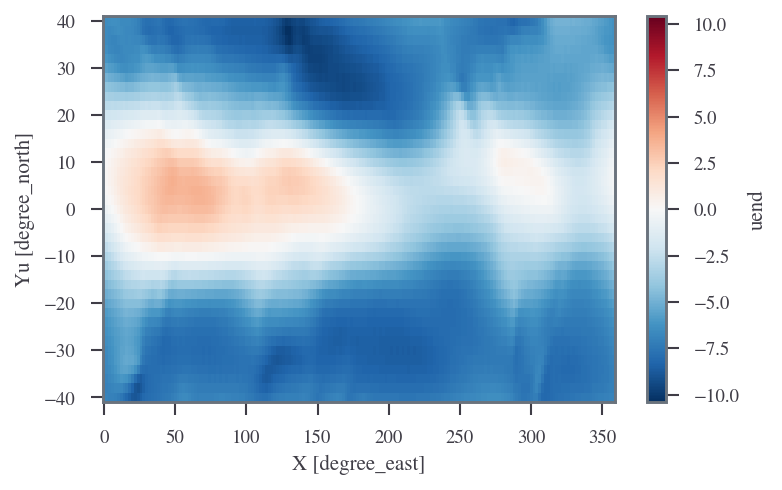

In [44]:
uend.sel(Yu=slice(-40, 40))

In [34]:
xr.open_dataset(setup.tau_y(0), decode_times=False).Y

<xarray.DataArray 'Y' (Y: 181)>
array([-90., -89., -88., -87., -86., -85., -84., -83., -82., -81., -80., -79.,
       -78., -77., -76., -75., -74., -73., -72., -71., -70., -69., -68., -67.,
       -66., -65., -64., -63., -62., -61., -60., -59., -58., -57., -56., -55.,
       -54., -53., -52., -51., -50., -49., -48., -47., -46., -45., -44., -43.,
       -42., -41., -40., -39., -38., -37., -36., -35., -34., -33., -32., -31.,
       -30., -29., -28., -27., -26., -25., -24., -23., -22., -21., -20., -19.,
       -18., -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,
        -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,
         6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,
        18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,
        30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,
        42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,
        90.], dtype=float32)
Coordinates:
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Attributes:
    pointwidth:  1.0
    uniquename:  Y
    gridtype:    0
    units:       degree_north

In [33]:
xr.open_dataset(setup.tau_x(0), decode_times=False).Y

<xarray.DataArray 'Y' (Y: 181)>
array([-90., -89., -88., -87., -86., -85., -84., -83., -82., -81., -80., -79.,
       -78., -77., -76., -75., -74., -73., -72., -71., -70., -69., -68., -67.,
       -66., -65., -64., -63., -62., -61., -60., -59., -58., -57., -56., -55.,
       -54., -53., -52., -51., -50., -49., -48., -47., -46., -45., -44., -43.,
       -42., -41., -40., -39., -38., -37., -36., -35., -34., -33., -32., -31.,
       -30., -29., -28., -27., -26., -25., -24., -23., -22., -21., -20., -19.,
       -18., -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,
        -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,
         6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,
        18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,
        30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,
        42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,
        90.], dtype=float32)
Coordinates:
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Attributes:
    pointwidth:  1.0
    uniquename:  Y
    gridtype:    0
    units:       degree_north

In [11]:
xr.open_dataset(setup.ts_clim60(0), decode_times=False).ts

<xarray.DataArray 'ts' (lat: 121, lon: 360)>
array([[272.35745, 272.36572, 272.3738 , ..., 272.33817, 272.34207, 272.34915],
       [272.44464, 272.44553, 272.44965, ..., 272.45956, 272.45172, 272.44693],
       [272.5696 , 272.56668, 272.5674 , ..., 272.61224, 272.59235, 272.578  ],
       ...,
       [283.0484 , 283.06445, 283.03735, ..., 282.94315, 282.93237, 282.98486],
       [282.98822, 282.97885, 282.95038, ..., 283.03952, 282.9837 , 282.98413],
       [282.9207 , 282.91418, 282.8777 , ..., 283.0664 , 282.98663, 282.93576]],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -60.0 -59.0 -58.0 -57.0 -56.0 ... 57.0 58.0 59.0 60.0
Attributes:
    offline_operation:   time average and spatial interpolation
    _Fillvalue:          9.96921e+36
    _CoordinateAxes:     time depth lat lon
    interval_write:      monthly
    coordinates:         time depth lat lon
    dodsname:            sst
    units:               degree_Celsius
    associate:           time depth lat lon
    standard_name:       sea_water_potential_temperature
    file_missing_value:  -999
    long_name:           ts
    longname:            ts

In [77]:
can_coords(xr.open_dataset(setup.ts_clim60(0), decode_times=False))

<xarray.Dataset>
Dimensions:  (X: 360, Y: 121)
Coordinates:
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * Y        (Y) float32 -60.0 -59.0 -58.0 -57.0 -56.0 ... 57.0 58.0 59.0 60.0
Data variables:
    ts       (Y, X) float32 ...

In [63]:
xr.open_dataset(setup.ts_clim60(0), decode_times=False)

<xarray.Dataset>
Dimensions:  (lat: 121, lon: 360)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -60.0 -59.0 -58.0 -57.0 -56.0 ... 57.0 58.0 59.0 60.0
Data variables:
    ts       (lat, lon) float32 ...

In [38]:
xr.open_dataset(setup.ts_trend(0), decode_times=False)

<xarray.Dataset>
Dimensions:  (X: 360, Y: 181)
Coordinates:
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    ts       (Y, X) float32 ...

In [ ]:
xr.open_dataset(setup.ts_trend(0), decode_times=False).ts.plot()

<xarray.DataArray 'SST_SST' (T_03: 25, L_03: 1, Y_03: 161, X_03: 360)>
[1449000 values with dtype=float32]
Coordinates:
  * X_03     (X_03) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * Y_03     (Y_03) float32 -80.0 -79.0 -78.0 -77.0 ... 77.0 78.0 79.0 80.0
  * L_03     (L_03) float32 1.0
  * T_03     (T_03) object 1957-12-30 10:59:51.650391 ... 1959-12-28 15:56:46...
Attributes:
    long_name:  SST


In [75]:
trend_final[10:171, :]

<xarray.DataArray 'ts' (Y: 161, X: 360)>
array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       ...,
       [ 0.006479,  0.039949,  0.001789, ...,  0.028187, -0.034004,  0.075599],
       [ 0.007149, -0.020549, -0.02345 , ..., -0.004003, -0.022984,  0.023812],
       [ 0.002786, -0.014768, -0.018332, ...,  0.005112,  0.000128,  0.012553]],
      dtype=float32)
Coordinates:
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * Y        (Y) float32 -80.0 -79.0 -78.0 -77.0 -76.0 ... 77.0 78.0 79.0 80.0
Attributes:
    _Fillvalue:          9.96921e+36
    standard_name:       sea_water_potential_temperature
    associate:           time depth lat lon
    dodsname:            sst
    interval_write:      monthly
    file_missing_value:  -999
    _CoordinateAxes:     time depth lat lon
    offline_operation:   time average and spatial interpolation
    coordinates:         time depth lat lon
    units:               degree_Celsius
    long_name:           sst
    longname:            sst

In [76]:
 trend_new[:, :]

<xarray.DataArray 'ts' (Y: 161, X: 360)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.0064787 ,  0.03994851,  0.00178853, ...,  0.02818659,
        -0.03400407,  0.075599  ],
       [ 0.00714948, -0.02054934, -0.02344991, ..., -0.00400267,
        -0.02298384,  0.02381161],
       [ 0.00278561, -0.01476776, -0.01833228, ...,  0.00511206,
         0.00012823,  0.01255268]])
Coordinates:
  * Y        (Y) float64 -80.0 -79.0 -78.0 -77.0 -76.0 ... 77.0 78.0 79.0 80.0
  * X        (X) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0

In [80]:
sst = can_coords(open_dataset(setup.om_run2f_nc()).SST_SST)
sst = sst # .where(sst != 0.0)
trend_new = (
    get_trend(sst + cfg.atm.temp_0_c, min_clim_f=True).rename("ts").isel(Z=0).drop("Z")
)
trend_old = xr.open_dataset(setup.ts_trend(0), decode_times=False).ts
trend_final = trend_old.copy()
trend_final[10:171, :] = trend_new[:, :]
print(trend_old.dims, trend_new.dims)
# trend_final[:, :] = trend_new[10:171, :]
trend_fin_ds = trend_final.to_dataset(name="ts")
trend_fin_ds.to_netcdf(setup.ts_trend(1))

run 62053015319824000 slope <xarray.DataArray 'polyfit_coefficients' (Z: 1, Y: 161, X: 360)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 1.04405847e-19,  6.43780371e-19,  2.88225855e-20, ...,
          4.54234062e-19, -5.47984094e-19,  1.21829695e-18],
        [ 1.15215628e-19, -3.31157767e-19, -3.77901198e-19, ...,
         -6.45040716e-20, -3.70390452e-19,  3.83730064e-19],
        [ 4.48908754e-20, -2.37986181e-19, -2.95429250e-19, ...,
          8.23821474e-20,  2.06653338e-21,  2.02289628e-19]]])
Coordinates:
  * Z        (Z) float64 1.0
  * Y        (Y) float64 -80.0 -79.0 -78.0 -77.0 -76.0 ... 77.0 78.0 79.0 80.0
  * X        (X

In [112]:
# take mean
sst_mean = sst.mean("T").isel(Z=0).drop("Z") + cfg.atm.temp_0_c

# ts_clim60
sst_a = sst_mean.rename({"Y": "lat", "X": "lon"})
sst_mean60_old = xr.open_dataset(setup.ts_clim60(0), decode_times=False)
sst_mean60_final = sst_mean60_old.copy()
sst_mean60_final.ts[:, :] = sst_a[20:141, :]
sst_mean60_final.to_netcdf(setup.ts_clim60(1))

# ts_clim
sst_b = sst_mean.rename({"Y": "Y", "X": "X"})
sst_mean_old = xr.open_dataset(setup.ts_clim(0), decode_times=False)
sst_mean_final = sst_mean_old.copy()
sst_mean_final.ts[10:171, :] = sst_b[:, :]
sst_mean_final.to_netcdf(setup.ts_clim(1))

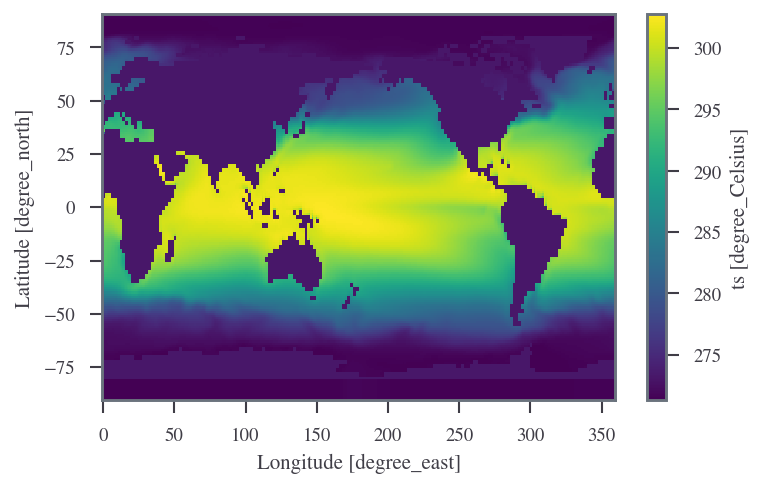

In [115]:
sst_mean_final.ts.plot()

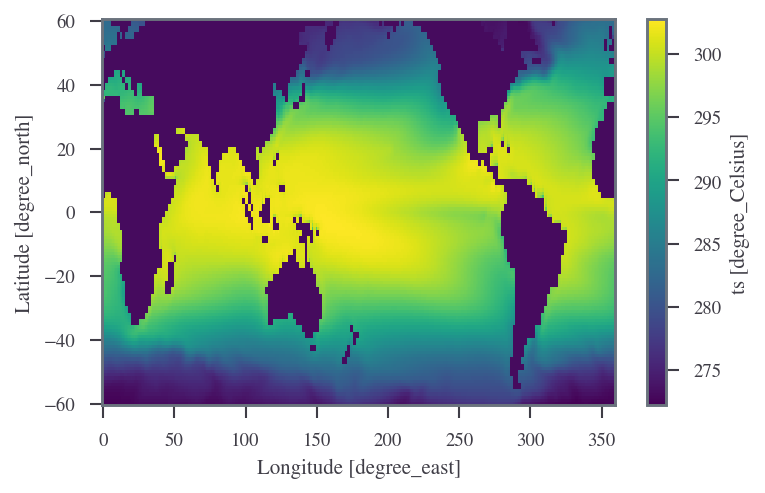

In [116]:
sst_mean60_final.ts.plot()

In [108]:
xr.open_dataset(setup.ts_clim(0), decode_times=False).ts[:, :]

<xarray.DataArray 'ts' (Y: 181, X: 360)>
array([[271.39435, 271.3733 , 271.3733 , ..., 271.42206, 271.42206, 271.41873],
       [271.39435, 271.3733 , 271.3733 , ..., 271.42206, 271.42206, 271.41873],
       [271.39435, 271.3733 , 271.3733 , ..., 271.42206, 271.42206, 271.41873],
       ...,
       [271.40546, 271.40454, 271.40366, ..., 271.40817, 271.40726, 271.40634],
       [271.41605, 271.4157 , 271.4154 , ..., 271.41705, 271.4167 , 271.41638],
       [271.42194, 271.42184, 271.42178, ..., 271.42218, 271.4221 , 271.42203]],
      dtype=float32)
Coordinates:
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes:
    _CoordinateAxes:     time depth lat lon
    file_missing_value:  -999
    _Fillvalue:          9.96921e+36
    units:               degree_Celsius
    associate:           time depth lat lon
    coordinates:         time depth lat lon
    standard_name:       sea_water_potential_temperature
    offline_operation:   time average and spatial interpolation
    dodsname:            sst
    interval_write:      monthly
    longname:            ts
    long_name:           ts

In [110]:
sst_mean

<xarray.DataArray 'SST_SST' (Y: 161, X: 360)>
array([[273.15   , 273.15   , 273.15   , ..., 273.15   , 273.15   ,
        273.15   ],
       [273.15   , 273.15   , 273.15   , ..., 273.15   , 273.15   ,
        273.15   ],
       [273.15   , 273.15   , 273.15   , ..., 273.15   , 273.15   ,
        273.15   ],
       ...,
       [273.85687, 274.21182, 274.50885, ..., 272.76566, 273.12387,
        273.52332],
       [272.86523, 273.19055, 273.5191 , ..., 271.95938, 272.2146 ,
        272.543  ],
       [271.87378, 272.07193, 272.28058, ..., 271.52167, 271.58267,
        271.70917]], dtype=float32)
Coordinates:
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * Y        (Y) float32 -80.0 -79.0 -78.0 -77.0 -76.0 ... 77.0 78.0 79.0 80.0

In [106]:
 xr.open_dataset(setup.ts_clim60(0), decode_times=False)

<xarray.Dataset>
Dimensions:  (lat: 121, lon: 360)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -60.0 -59.0 -58.0 -57.0 -56.0 ... 57.0 58.0 59.0 60.0
Data variables:
    ts       (lat, lon) float32 ...

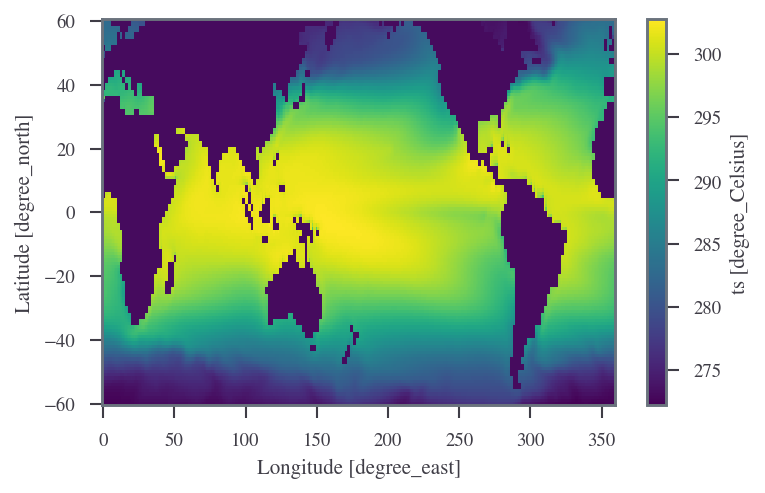

In [101]:
sst_mean_final.ts.plot()

In [96]:
sst_b[20:141, :]

<xarray.DataArray 'SST_SST' (lat: 121, lon: 360)>
array([[272.38577, 272.3922 , 272.40662, ..., 272.36533, 272.3703 ,
        272.37427],
       [272.4746 , 272.4745 , 272.4868 , ..., 272.48563, 272.48416,
        272.471  ],
       [272.6019 , 272.59955, 272.60846, ..., 272.63818, 272.62756,
        272.60294],
       ...,
       [283.01514, 283.0225 , 283.00308, ..., 273.15   , 282.6899 ,
        282.94995],
       [282.9498 , 282.9321 , 282.91544, ..., 282.6023 , 282.87973,
        282.9419 ],
       [282.8959 , 282.8715 , 282.8494 , ..., 282.9955 , 282.95456,
        282.90125]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -60.0 -59.0 -58.0 -57.0 -56.0 ... 57.0 58.0 59.0 60.0

In [99]:
sst_mean_final.ts[:, :]

<xarray.DataArray 'ts' (lat: 121, lon: 360)>
array([[272.35745, 272.36572, 272.3738 , ..., 272.33817, 272.34207, 272.34915],
       [272.44464, 272.44553, 272.44965, ..., 272.45956, 272.45172, 272.44693],
       [272.5696 , 272.56668, 272.5674 , ..., 272.61224, 272.59235, 272.578  ],
       ...,
       [283.0484 , 283.06445, 283.03735, ..., 282.94315, 282.93237, 282.98486],
       [282.98822, 282.97885, 282.95038, ..., 283.03952, 282.9837 , 282.98413],
       [282.9207 , 282.91418, 282.8777 , ..., 283.0664 , 282.98663, 282.93576]],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -60.0 -59.0 -58.0 -57.0 -56.0 ... 57.0 58.0 59.0 60.0
Attributes:
    offline_operation:   time average and spatial interpolation
    _Fillvalue:          9.96921e+36
    _CoordinateAxes:     time depth lat lon
    interval_write:      monthly
    coordinates:         time depth lat lon
    dodsname:            sst
    units:               degree_Celsius
    associate:           time depth lat lon
    standard_name:       sea_water_potential_temperature
    file_missing_value:  -999
    long_name:           ts
    longname:            ts

In [70]:
trend_old_ds = xr.open_dataset(setup.ts_trend(0), decode_times=False)
print(trend_old_ds)

<xarray.Dataset>
Dimensions:  (X: 360, Y: 181)
Coordinates:
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    ts       (Y, X) float32 ...


In [60]:
trend_old[10:171, :]

<xarray.DataArray 'ts' (Y: 161, X: 360)>
array([[0.166413, 0.221416, 0.221416, ..., 0.111409, 0.111409, 0.111409],
       [0.166413, 0.221416, 0.221416, ..., 0.111409, 0.111409, 0.111409],
       [0.166413, 0.221416, 0.221416, ..., 0.111409, 0.111409, 0.111409],
       ...,
       [2.276932, 2.309406, 2.265213, ..., 1.564014, 1.926254, 2.155232],
       [1.811305, 2.170263, 2.452   , ..., 0.68593 , 1.030172, 1.435931],
       [0.673403, 0.956533, 1.259525, ..., 0.184568, 0.254275, 0.434648]],
      dtype=float32)
Coordinates:
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * Y        (Y) float32 -80.0 -79.0 -78.0 -77.0 -76.0 ... 77.0 78.0 79.0 80.0
Attributes:
    _Fillvalue:          9.96921e+36
    standard_name:       sea_water_potential_temperature
    associate:           time depth lat lon
    dodsname:            sst
    interval_write:      monthly
    file_missing_value:  -999
    _CoordinateAxes:     time depth lat lon
    offline_operation:   time average and spatial interpolation
    coordinates:         time depth lat lon
    units:               degree_Celsius
    long_name:           sst
    longname:            sst

In [84]:
xr.open_dataset(setup.ts_clim60(0), decode_times=False)

<xarray.Dataset>
Dimensions:  (lat: 121, lon: 360)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -60.0 -59.0 -58.0 -57.0 -56.0 ... 57.0 58.0 59.0 60.0
Data variables:
    ts       (lat, lon) float32 ...

In [58]:
trend_new[:, :]

<xarray.DataArray 'ts' (Y: 161, X: 360)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.0064787 ,  0.03994851,  0.00178853, ...,  0.02818659,
        -0.03400407,  0.075599  ],
       [ 0.00714948, -0.02054934, -0.02344991, ..., -0.00400267,
        -0.02298384,  0.02381161],
       [ 0.00278561, -0.01476776, -0.01833228, ...,  0.00511206,
         0.00012823,  0.01255268]])
Coordinates:
  * Y        (Y) float64 -80.0 -79.0 -78.0 -77.0 -76.0 ... 77.0 78.0 79.0 80.0
  * X        (X) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0

In [37]:
setup.ts_trend(0)

'/home/users/sithom/seager19/src/test/test_direc/atmos/DATA/ts-ECMWF-trend.nc'

In [16]:
os.listdir(setup.ocean_output_path)

['om_diag.nc',
 'om_test.save',
 'om_spin.save',
 'om_spin.nc',
 'om_spin.20y.restart',
 'om_diag.save',
 'om_diag.2y.restart',
 'om_run2f.save',
 'om_run2f.nc']

In [ ]:
os.listdir(setup.ocean_output_path)

. For coupling, the drag coefficient, cD—used to convert modelled winds into stresses to force the ocean component—is 2.25 × 10−3, which is about 50% larger than typical values, but was found necessary for a coupled response with approximately the observed amplitude.

In [17]:
os.listdir(setup.atmos_path)

['DATA',
 'tmp',
 'prTrend.png',
 'S90-H2000-Stab.eps',
 'S91-hq1800-prcp_land1.nc',
 'Q.nc',
 'dQ.nc',
 'Tsp4.eps']

In [18]:
os.listdir(setup.atmos_data_path)

['clt-ECMWF-clim60.nc',
 'mask-360x180.nc',
 'mask-360x181.nc',
 'pr-ECMWF-clim.nc',
 'pr-ECMWF-trend.nc',
 'ps-ECMWF-clim.nc',
 'rh-ECMWF-clim60.nc',
 'rh-fixed-clim60.nc',
 'sfcWind-ECMWF-clim60.nc',
 'sfcWind-ECMWF-clim.nc',
 'sst-ECMWF-clim.nc',
 'sst-ECMWF-trend.nc',
 'ts-ECMWF-clim60.nc',
 'ts-ECMWF-clim.nc',
 'ts-ECMWF-trend.nc']

In [51]:
coup = Coupling(cfg, setup)
coup.run()

setting up spin up run
editing  /home/users/sithom/seager19/src/test/test_direc/ocean/RUN/om_spin
editing  /home/users/sithom/seager19/src/test/test_direc/ocean/RUN/om_diag
editing  /home/users/sithom/seager19/src/test/test_direc/ocean/RUN/om_run2f
run
cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
../SRC/tcom -i om_test 2.06181 s
cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
../SRC/tcom -i om_spin -t om_spin.tios 06 min 21 s
cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
../SRC/tios2cdf -f output/om_spin 4.74177 s
cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
rm -rf output/om_spin.data output/om_spin.indx 0.11886 s
cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
cp -f output/om_spin.save output/om_spin.20y.restart 0.04131 s
cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
../SRC/tcom -i om_diag -t om_diag.tios 59.73697 s
cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
../SRC/tios2cdf

AttributeError: 'ModelSetup' object has no attribute 'nino_plot_path'

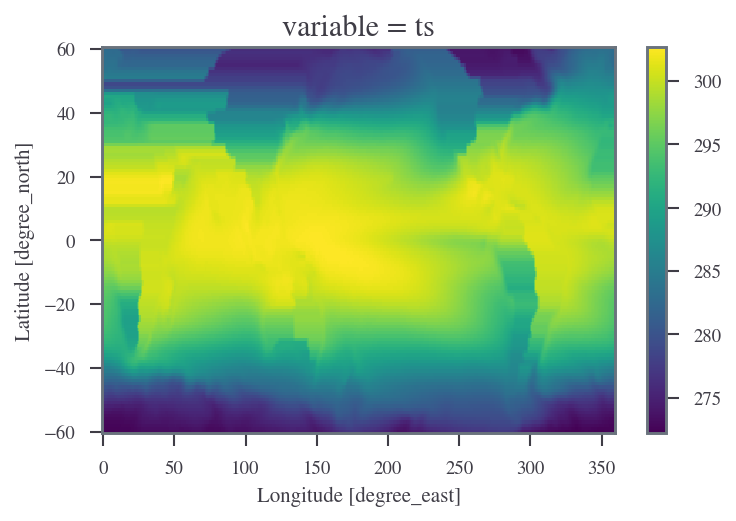

In [15]:
open_dataarray(os.path.join(setup.atmos_data_path, "ts-ECMWF-clim60.nc")).plot()

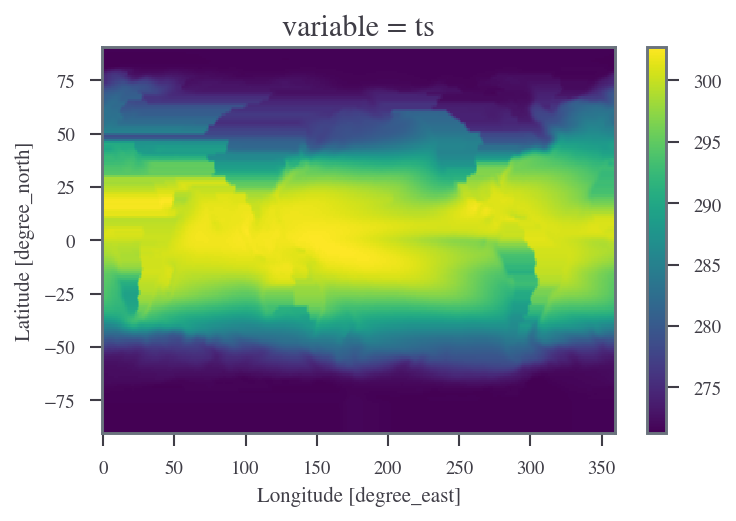

In [16]:
open_dataarray(os.path.join(setup.atmos_data_path, "ts-ECMWF-clim.nc")).plot()

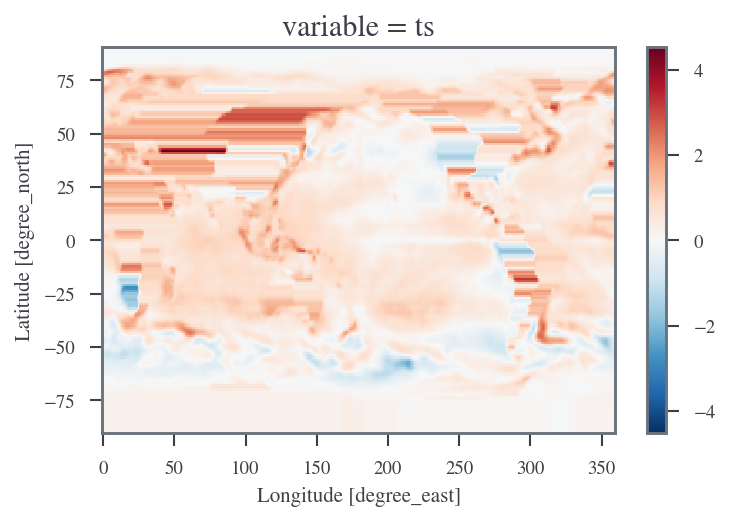

In [14]:
open_dataarray(os.path.join(setup.atmos_data_path, "ts-ECMWF-trend.nc")).plot()

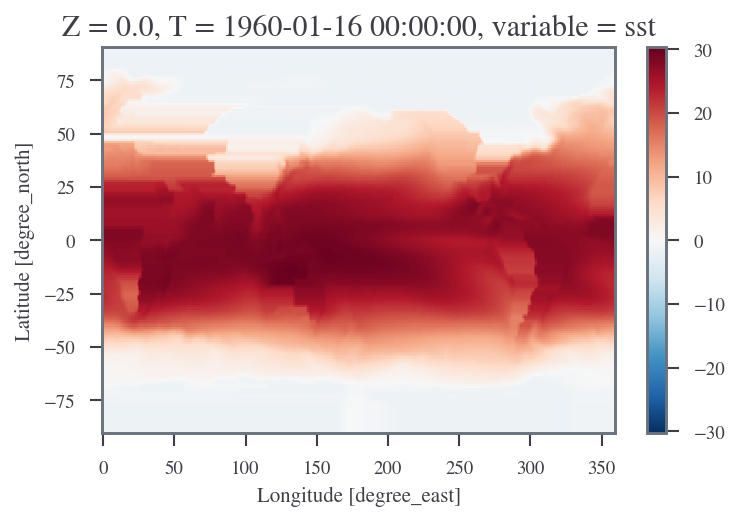

In [23]:
open_dataarray(os.path.join(setup.atmos_data_path, "sst-ECMWF-clim.nc")).isel(T=0).plot()

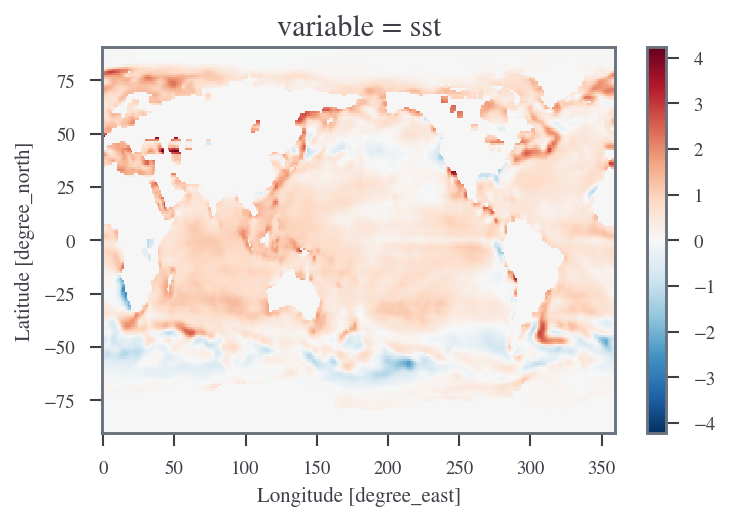

In [17]:
open_dataarray(os.path.join(setup.atmos_data_path, "sst-ECMWF-trend.nc")).plot()

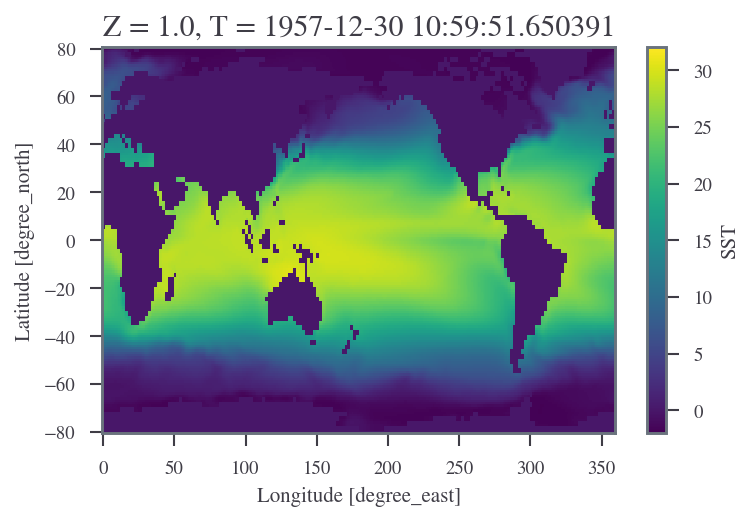

In [29]:
can_coords(open_dataset(setup.om_run2f_nc()).SST_SST).isel(T=0).plot(vmin=-2, vmax=32)

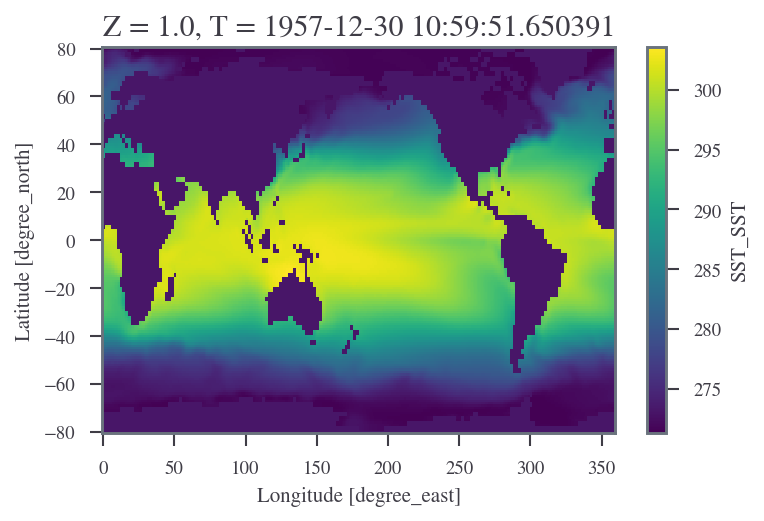

In [49]:
(
    can_coords(open_dataset(setup.om_run2f_nc()).SST_SST).isel(T=0) + cfg.atm.temp_0_c
).plot()

In [118]:
from src.xr_utils import get_clim, get_trend, open_dataset, open_dataarray

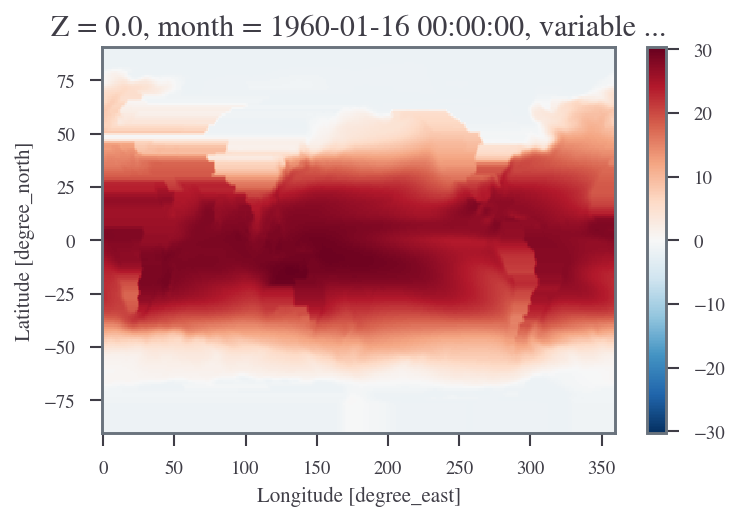

In [121]:
open_dataarray(os.path.join(setup.atmos_data_path, "sst-ECMWF-clim.nc")).rename(
    {"T": "month"}
).isel(variable=0, month=0).plot()

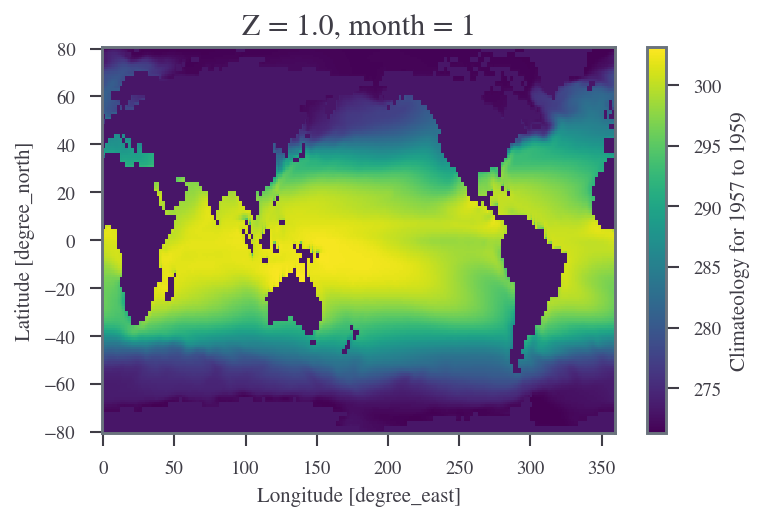

In [38]:
get_clim(
    can_coords(open_dataset(setup.om_run2f_nc()).SST_SST) + cfg.atm.temp_0_c
).isel(month=0).plot()

In [ ]:
get_clim(
    can_coords(open_dataset(setup.om_run2f_nc()).SST_SST) + cfg.atm.temp_0_c
).isel(month=0)

run 62053015319824000 slope <xarray.DataArray 'polyfit_coefficients' (Z: 1, Y: 161, X: 360)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 1.04405847e-19,  6.43780371e-19,  2.88225855e-20, ...,
          4.54234062e-19, -5.47984094e-19,  1.21829695e-18],
        [ 1.15215628e-19, -3.31157767e-19, -3.77901198e-19, ...,
         -6.45040716e-20, -3.70390452e-19,  3.83730064e-19],
        [ 4.48908754e-20, -2.37986181e-19, -2.95429250e-19, ...,
          8.23821474e-20,  2.06653338e-21,  2.02289628e-19]]])
Coordinates:
  * Z        (Z) float64 1.0
  * Y        (Y) float64 -80.0 -79.0 -78.0 -77.0 -76.0 ... 77.0 78.0 79.0 80.0
  * X        (X

<xarray.DataArray 'trend' (Z: 1, Y: 161, X: 360)>
array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.0064787 ,  0.03994851,  0.00178853, ...,  0.02818659,
         -0.03400407,  0.075599  ],
        [ 0.00714948, -0.02054934, -0.02344991, ..., -0.00400267,
         -0.02298384,  0.02381161],
        [ 0.00278561, -0.01476776, -0.01833228, ...,  0.00511206,
          0.00012823,  0.01255268]]])
Coordinates:
  * Z        (Z) float64 1.0
  * Y        (Y) float64 -80.0 -79.0 -78.0 -77.0 -76.0 ... 77.0 78.0 79.0 80.0
  * X        (X) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0

In [ ]:
from src.xr_utils import get_clim, get_trend

In [9]:
import os
import xarray as xr
from src.xr_utils import open_dataset, open_dataarray, sel, can_coords
from src.plot_utils import add_units

In [39]:
xr.open_dataset(os.path.join(setup.atmos_path, "dQ.nc"))

<xarray.Dataset>
Dimensions:  (lat: 121, lon: 360)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -60.0 -59.0 -58.0 -57.0 -56.0 ... 57.0 58.0 59.0 60.0
Data variables:
    dq_dt    (lat, lon) float32 ...
    dq_df    (lat, lon) float32 ...
    ALH      (lat, lon) float32 ...
    ALW      (lat, lon) float32 ...
    BLW      (lat, lon) float32 ...
    dTse     (lat, lon) float32 ...
    rh       (lat, lon) float32 ...
    Ub       (lat, lon) float32 ...
    Cb       (lat, lon) float32 ...
    Tsb      (lat, lon) float32 ...

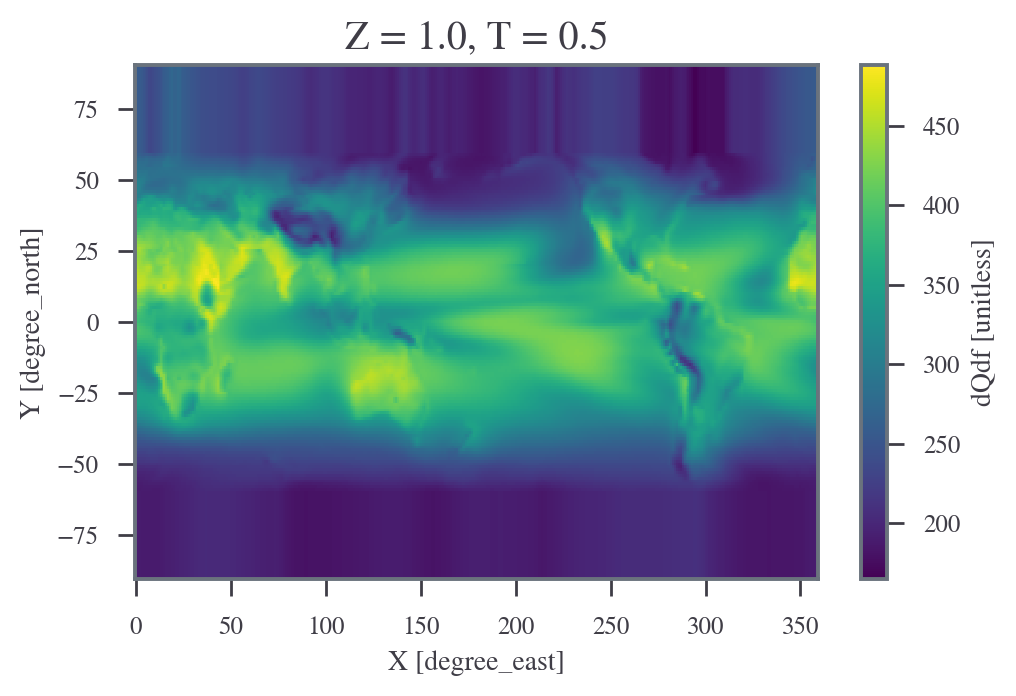

In [51]:
xr.open_dataarray(os.path.join(setup.ocean_data_path, "dQdf-sample.nc"), decode_times=False).isel(T=0).plot()

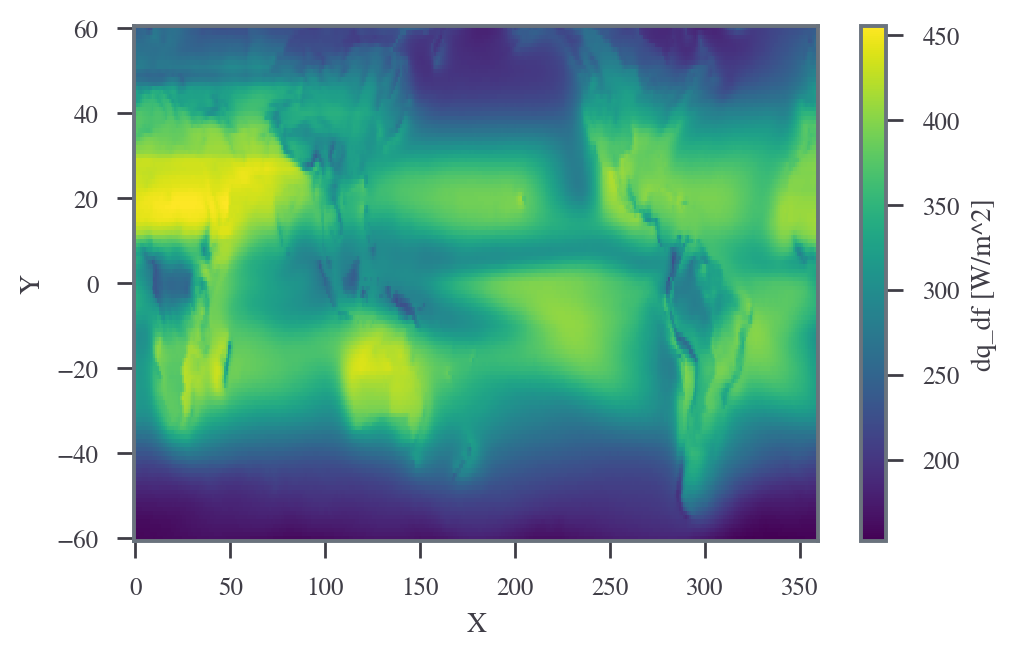

In [52]:
can_coords(open_dataset(os.path.join(setup.atmos_path, "dQ.nc"))).dq_df.plot()

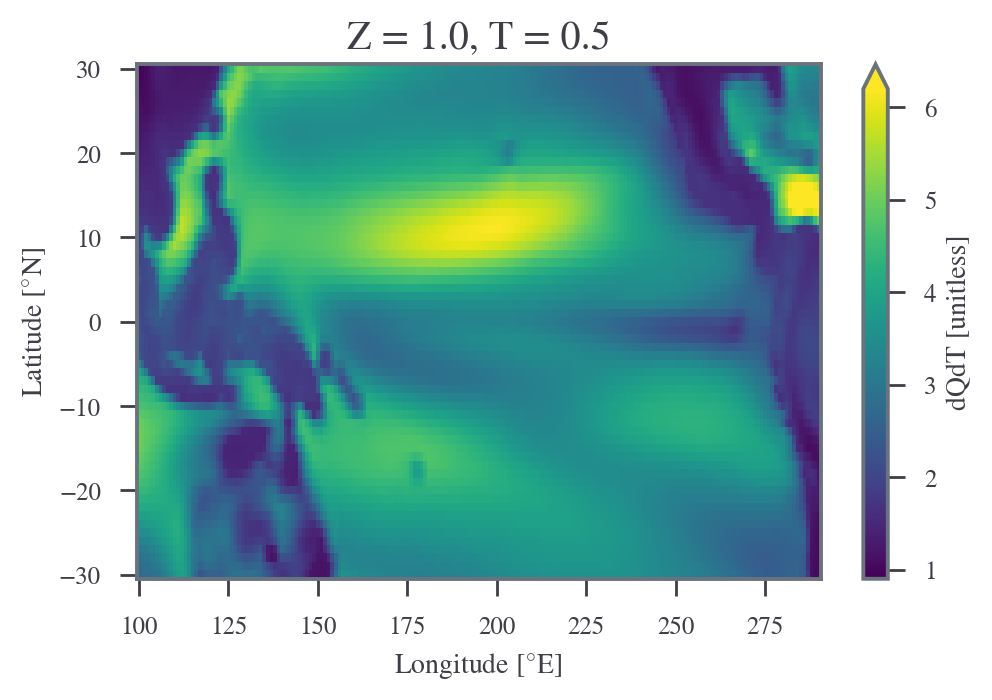

In [67]:
add_units(sel(xr.open_dataarray(
    os.path.join(setup.ocean_data_path, "dQdT-sample.nc"), decode_times=False
))).isel(T=0, Z=0).plot(vmin=0.9, vmax=6.2)

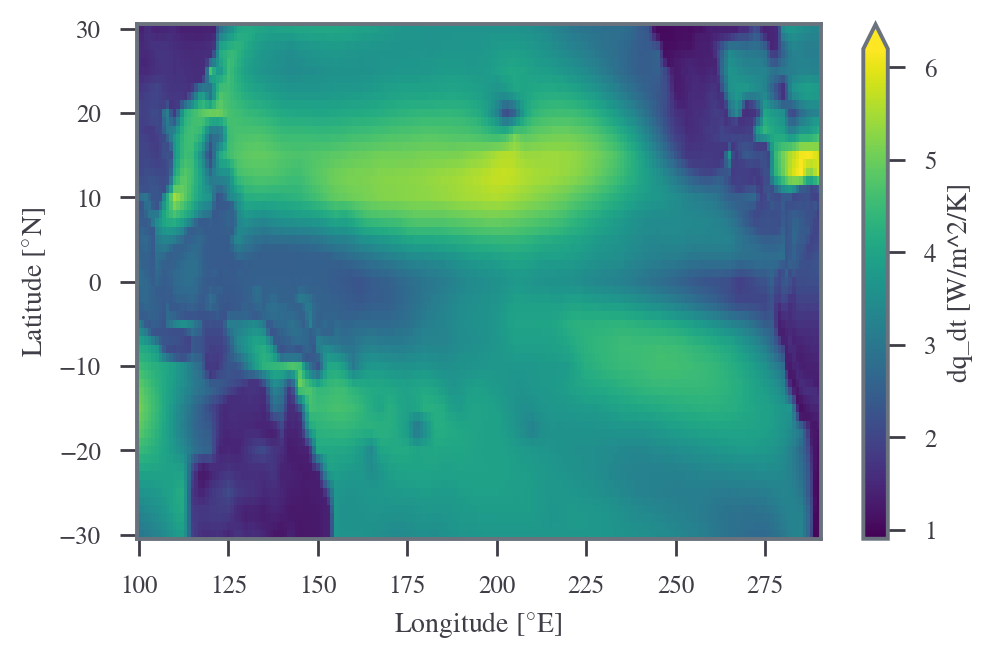

In [66]:
add_units(sel(can_coords(open_dataset(os.path.join(setup.atmos_path, "dQ.nc"))).dq_dt)).plot(
    vmin=0.9, vmax=6.2
)

## Look at variations during the year of dqdt-sample

In [70]:
import matplotlib.pyplot as plt

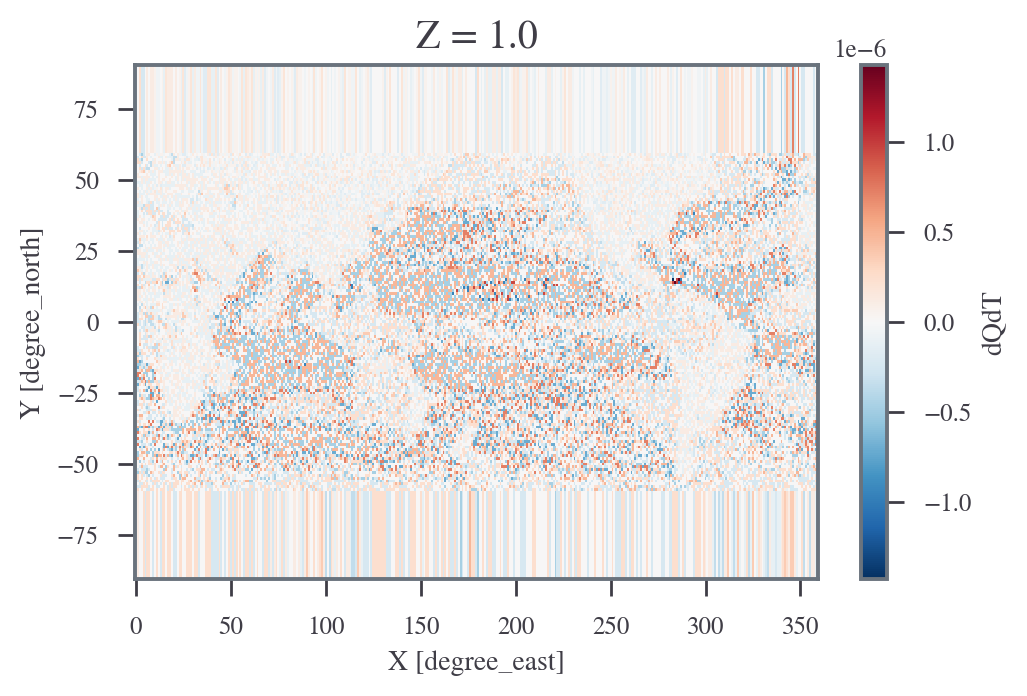

In [77]:
(xr.open_dataarray(
        os.path.join(setup.ocean_data_path, "dQdT-sample.nc"), decode_times=False
    ).isel(T=0).drop(["T", "Z"])
-
xr.open_dataarray(
        os.path.join(setup.ocean_data_path, "dQdT-sample.nc"), decode_times=False
    ).mean("T")).plot()

In [78]:
import recursive_diff

In [83]:
for x in recursive_diff.recursive_diff(xr.open_dataarray(
        os.path.join(setup.ocean_data_path, "dQdT-sample.nc"), decode_times=False
    ).isel(T=0).isel(Z=0).drop(["T", "Z"]),
    xr.open_dataarray(
            os.path.join(setup.ocean_data_path, "dQdT-sample.nc"), decode_times=False
        ).mean("T").isel(Z=0).drop(["Z"]), rel_tol=1e-6):
    print(x)

[attrs]: Pair file_missing_value:-999 is in LHS only
[attrs]: Pair fnname:max is in LHS only
[attrs]: Pair long_name:dQdT is in LHS only
[attrs]: Pair longname:dQdT is in LHS only
[attrs]: Pair pointwidth:1.0 is in LHS only
[attrs]: Pair units:unitless is in LHS only


## Look at year of dQdf-sample

In [84]:
for x in recursive_diff.recursive_diff(xr.open_dataarray(
        os.path.join(setup.ocean_data_path, "dQdf-sample.nc"), decode_times=False
    ).isel(T=0).isel(Z=0).drop(["T", "Z"]),
    xr.open_dataarray(
            os.path.join(setup.ocean_data_path, "dQdf-sample.nc"), decode_times=False
        ).mean("T").isel(Z=0).drop(["Z"]), rel_tol=1e-6):
    print(x)

[attrs]: Pair file_missing_value:-999 is in LHS only
[attrs]: Pair long_name:dQdf is in LHS only
[attrs]: Pair longname:dQdf is in LHS only
[attrs]: Pair pointwidth:1.0 is in LHS only
[attrs]: Pair units:unitless is in LHS only


In [85]:
dQdf_sample = xr.open_dataarray(
        os.path.join(setup.ocean_data_path, "dQdf-sample.nc"), decode_times=False
    )

In [86]:
dQdf_new = dQdf_sample.copy()

In [101]:
dQdf_new

<xarray.DataArray 'dQdf' (T: 12, Z: 1, Y: 181, X: 360)>
[781920 values with dtype=float32]
Coordinates:
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * Z        (Z) float32 1.0
  * T        (T) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes:
    file_missing_value:  -999
    pointwidth:          1.0
    units:               unitless
    long_name:           dQdf
    longname:            dQdf

In [88]:
dq_df_from_atm = open_dataset(os.path.join(setup.atmos_path, "dQ.nc")).dq_df

In [94]:
dQdf_new[0, 0, :, :]
# dq_df_from_atm.plot()

<xarray.DataArray 'dQdf' (Y: 181, X: 360)>
array([[189.03711, 188.9266 , 188.80602, ..., 188.47633, 188.80489, 188.93541],
       [189.03711, 188.9266 , 188.80602, ..., 188.47633, 188.80489, 188.93541],
       [189.03711, 188.9266 , 188.80602, ..., 188.47633, 188.80489, 188.93541],
       ...,
       [256.47128, 257.01053, 257.02246, ..., 254.786  , 255.52902, 256.0243 ],
       [256.47128, 257.01053, 257.02246, ..., 254.786  , 255.52902, 256.0243 ],
       [256.47128, 257.01053, 257.02246, ..., 254.786  , 255.52902, 256.0243 ]],
      dtype=float32)
Coordinates:
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
    Z        float32 1.0
    T        float32 0.5
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes:
    file_missing_value:  -999
    pointwidth:          1.0
    units:               unitless
    long_name:           dQdf
    longname:            dQdf

In [103]:
for t in range(12):
    dQdf_new[t, 0, 30:151, :] = can_coords(dq_df_from_atm)[:, :]

In [124]:
for x in recursive_diff.recursive_diff(
    dQdf_new.to_dataset(),
    xr.open_dataset(
        os.path.join(setup.ocean_data_path, "dQdf-sample.nc"),
        decode_times=False,
    ),
    rel_tol=0.5,
):
    print(x)